# Laboratory practice 5 (2 sessions)

- This .pynb file is ready for execution in a Google Colab (https://colab.research.google.com) environment. Just upload it and open it from a regular Colab session.

- If you have any question about this lab, please send an email to Carmen G. Almudever (cargara2@disca.upv.es)


- The answers of Lab 5 have to be sent by email to Carmen G. Almudever (cargara2@disca.upv.es) in case you do not attend the lab session or you do not manage to finish all exercises during the lab session. (Use the "print" menu option of the Google Colab environment to create a PDF file. **Please name the file with your answers as “Lab5_student_name.pdf”**)

- **Note that the deadline for sending the answers of Lab 5 is May 4.**


## Quantum Error Correction

Prerequisite 

- Slides of Quantum Error Correction lecture

In [ ]:
# ALWAYS RUN THIS CELL AFTER YOU LOAD (OR RELOAD) THE NOTEBOOK

# Generic cell for correct operation of QCO materials in Google Colab (jcperez@disca.upv.es):
!pip -qqq install qiskit[visualization]
import qiskit
%matplotlib inline
qiskit.__version__

# Not always necessary (jcperez@disca.upv.es):
!pip -qqq install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

# To fix a bug/version incompatibility in that file (jcperez@disca.upv.es):
!sed -ie 's/denominator >/denominator() >/g' /usr/local/lib/python3.9/dist-packages/qiskit/visualization/array.py

# To set graphical circuit drawing by default in qiskit (jcperez@disca.upv.es):
!mkdir ${HOME}/.qiskit 2>/dev/null
!printf "[default]\ncircuit_drawer = mpl\n" > ${HOME}/.qiskit/settings.conf

In [ ]:
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex
from math import sqrt, pi

<h2 style="font-size:24px;">The 3 qubit bit-flip code</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Understand how the 3 qubit bit-flip code works.</p>
</div>


As explained in the lecture on quantum error correction, qubits and gates are error prone and therefore quantum error correction protocols are required to protect the quantum information. In quantum error correction a logical qubit is encoded into several physical qubits and errors are detected by performing parity check measurements.  

One of the simplest quantum error correction codes is the 3 qubit bit-flip code that can detect and correct single bit-flip errors. As shown in the picture below, we use 3 qubits for encoding the logical qubit (data qubits) and 2 ancilla qubits for extracting the error syndromes.

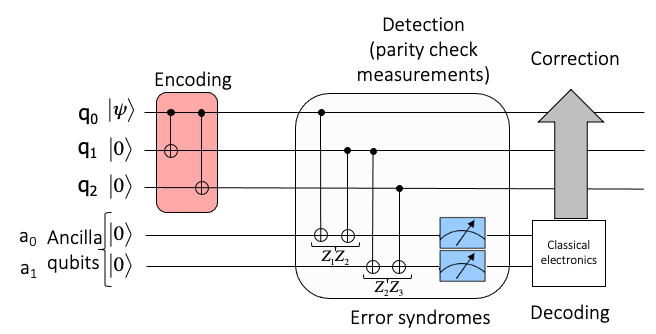

In this first exercise you will have to write the code for 3 qubit bit-flip QEC code and see what happens when different single-qubit errors are injected. 




<h3 style="font-size: 20px"> 1. Creating the 3 bit flip-code circuit (0,5 points) </h3> 



<h4 style="font-size: 17px">&#128211;Step 1. Encoding a logical qubit.</h4>

We will start by creating a Python function for the encoding part, in which we will initialize q0 to $|\psi \rangle = |1\rangle$ and encode it to a logical qubit $|\psi_L \rangle = |111\rangle$.

In [ ]:
def encoding(qc, d0, d1, d2):
    
    #### your code goes here
    
    
    qc.barrier()

<h4 style="font-size: 17px">&#128211;Step 2.Detecting bit-flip errors (0,5 points)</h4>

Now, we will create another Pyhton function for the detection part as shown in the picture above.

In [ ]:
def detection(qc, d0, d1, d2, a0, a1):
    
     #### your code goes here
    
    
    qc.barrier()
    
    #measurement ancilla qubits
    #### your code goes here
    
   

<h4 style="font-size: 17px">&#128211;Putting all parts together </h4>

Now we are ready for putting all parts together and run the bit-flip circuit.

In [ ]:
## SETUP
bitflip_circuit = QuantumCircuit()

## STEP 1: encoding



## STEP 2:detection


bitflip_circuit.draw()

<h4 style="font-size: 17px">&#128211;Checking the results (0,5 points) </h4>

In order to check that the circuit is working properly, we can use the statevector simulator. 

<p>&#128211; What are the states of $|q_3\rangle$ and $|q_4\rangle$ (ancilla qubits) and why?
    
<p>&#128211; What are the states of $|q_0\rangle$, $|q_1\rangle$ and $|q_2\rangle$? Or in other words, what is the state of the logical qubit $|\psi_L \rangle = |q_2q_1q_0\rangle$?

**Your answer:** (Asnwer the questions and add a picture of the Bloch spheres.)

In [ ]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(bitflip_circuit)
out_vector = sv_sim.run(bitflip_circuit).result().get_statevector()
plot_bloch_multivector(out_vector)


<h3 style="font-size: 20px"> 2. Injecting bit-flip errors and decoding them </h3>



We will now create a function that we will use to inject a single bit-flip error on q0 or q1 or q2. Please, write the corrresponding Python code.

In [ ]:
def error_injection(qc, d0, d1, d2):
    #function for injecting a bit-flip on q0, or on q1 or on q3
    
    #### your code goes here
    
    qc.barrier()

<h4 style="font-size: 17px">&#128211;Putting all parts together (again) </h4>

Now we are ready for putting all parts together, including the error_injection fuction and run the bit-flip circuit.

In [ ]:
## SETUP

bitflip_circuit = QuantumCircuit()

## STEP 1: encoding


## STEP 2: inserting errors


## STEP 3:detection


bitflip_circuit.draw()

<h4 style="font-size: 17px">&#128211;Checking the results (1 point) </h4>

Show what is the state of $|q_0\rangle$, $|q_1\rangle$, $|q_2\rangle$, $|q_3\rangle$ and $|q_4\rangle$ when injecting a single X error in: a) q0, b) q1 and c) q2. Fill in the following table based on the error syndromes you obtained in each case (LUT for the decoding of errors).

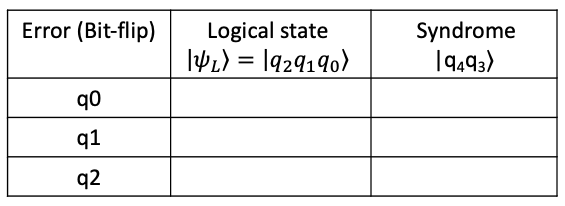


In [ ]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(bitflip_circuit)
out_vector = sv_sim.run(bitflip_circuit).result().get_statevector()
plot_bloch_multivector(out_vector)

<h3 style="font-size: 20px"> 3. Correcting bit-flip errors </h3>



Based on the obtained error syndromes, propose a common correction circuit which fix all the single bit-flip errors. We will create a function named “correction” that we will add as STEP 4, after the decoding part. 


In [ ]:
def error_injection(qc, d0, d1, d2):
#function for injecting a bit-flip on q0, or on q1 or on q3

    #### your code goes here
    
    qc.barrier()

In [ ]:
def correction(qc, d0, d1, d2, a0, a1):
     #### your code goes here
    
    
    qc.barrier()

<h4 style="font-size: 17px">&#128211;Putting all parts together (one more time) </h4>

Let's put all parts together, including the correction fuction and run the bit-flip circuit.

In [ ]:
## SETUP
bitflip_circuit = QuantumCircuit()

## STEP 1: encoding


## STEP 2: inserting errors


## STEP 3:detection


## STEP 4:correction


bitflip_circuit.draw()

<h4 style="font-size: 17px">&#128211;Checking the results (1 point) </h4>

Show the state of $|q_0\rangle$, $|q_1\rangle$, $|q_2\rangle$, $|q_3\rangle$ and $|q_4\rangle$ when injecting a single X error on: a) q0, b) q1 and the errors are corrected. Show a picture of the Bloch sphere for each case.



In [ ]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(bitflip_circuit)
out_vector = sv_sim.run(bitflip_circuit).result().get_statevector()
plot_bloch_multivector(out_vector)

<h2 style="font-size:24px;">The 3 qubit phase-flip code</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Understand how the 3 qubit phase-flip code works.</p>
</div>


We are now going to repeat all steps of previous exercise but for the 3 qubit phase-flip code.

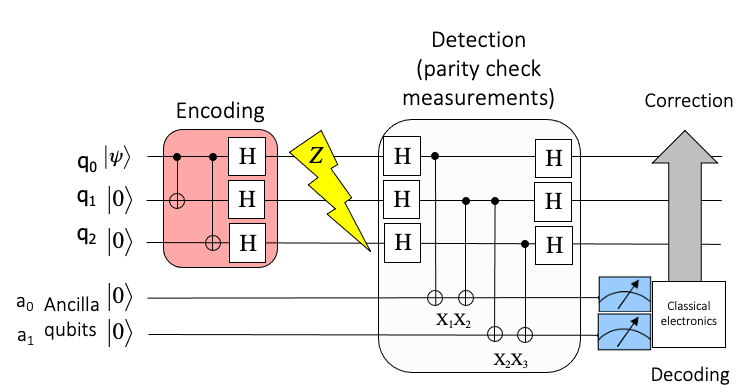

<h4 style="font-size: 17px">&#128211;Step 1. Encoding a logical qubit (0,5 points)</h4>

We will start by creating a Python function for the encoding part, in which we will initialize q0 to $|\psi \rangle = |1\rangle$ and encode it to a logical qubit $|\psi_L \rangle = |---\rangle$.

In [ ]:
def encoding(qc, d0, d1, d2):
    #### your code goes here
    
    qc.barrier()

<h4 style="font-size: 17px">&#128211;Step 2. Injecting phase-flip errors. </h4>

Create a function to inject a single phase-flip error on q0 or q1 or q2. 

In [ ]:
def error_injection(qc, d0, d1, d2):
#function for injecting a phase-flip on q0, or on q1 or on q2

     #### your code goes here
    
    qc.barrier()

<h4 style="font-size: 17px">&#128211;Step 3. Detecting phase-flip errors (0,5 points)</h4>

Now, we will create another Pyhton function for the detection part as shown in the picture above.

In [ ]:
def detection(qc, d0, d1, d2, a0, a1):
    
     #### your code goes here
    
    qc.barrier()
    
    #measurement ancilla qubit
    
     #### your code goes here
        

<h4 style="font-size: 17px">&#128211;Step 4. Correcting phase-flip errors (0,5 points) </h4>

As we did before, based on the obtained error syndromes, propose a common correction circuit which fix all the single phase-flip errors. 

In [ ]:
def correction(qc, d0, d1, d2, a0, a1):
    
     #### your code goes here
    
    
    qc.barrier()

<h4 style="font-size: 17px">&#128211;Putting all parts together </h4>

Let's put all parts together.

In [ ]:
## SETUP
phaseflip_circuit = QuantumCircuit()

## STEP 1: encoding


## STEP 2: inserting errors


## STEP 3:detection


## STEP 4:correction



phaseflip_circuit.draw()

<h4 style="font-size: 17px">&#128211;Checking the results (1,5 points) </h4>

Following the steps of previous section (the 3 bit-flip code) show the following:

1) In order to check that the circuit is working properly, show the state of $|q_3\rangle$ and $|q_4\rangle$ (ancilla qubits) when no errors are injected. And, what is the state of the logical qubit $|\psi_L \rangle = |q_2q_1q_0\rangle$?

2) Show the state of $|q_0\rangle$, $|q_1\rangle$, $|q_2\rangle$, $|q_3\rangle$ and $|q_4\rangle$ when injecting a single Z error in: a) q0, b) q1 and c) q2. Please, write down the error syndromes you obtained in each case (as the table you filled in before).


3) Show the state of $|q_0\rangle$, $|q_1\rangle$, $|q_2\rangle$, $|q_3\rangle$ and $|q_4\rangle$ when injecting a single Z error on: a) q0, b) q1 and c)q2 and the errors are corrected. Show a picture of the Bloch spheres for each case.



In [ ]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(phaseflip_circuit)
out_vector = sv_sim.run(phaseflip_circuit).result().get_statevector()
plot_bloch_multivector(out_vector)

<h2 style="font-size:24px;">The 7 qubit Steane code</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Understand how the 7 qubit Steane code works.</p>
</div>


During the lectures we discussed a more advanced QEC code, the 7-qubit Steane code, that can detect single bit-flip and phase-flip errors. The following Figure shows the circuit to encode a logical qubit using the 7-qubit Steane code.

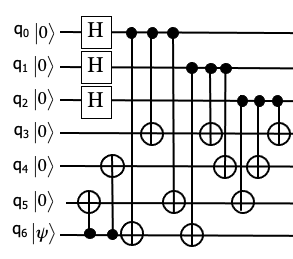

As we did in the previous exercises, we will complete the circuit with the error injection, the error detection and the decoding parts. 



<h4 style="font-size: 17px">&#128211;Step 1. Encoding a logical qubit (1 point)</h4>

We will start by creating a Python function for the encoding part, in which we will initialize q6 to $|\psi \rangle = |0\rangle$ and encode its corresponding logical state.

In [ ]:
def encoding(qc, d0, d1, d2, d3, d4, d5, d6):
    
     #### your code goes here
    
    qc.barrier()

<h4 style="font-size: 17px">&#128211;Step 2. Injecting phase-flip errors and bit-flip errors. </h4>

Create a function that we will use later to inject single bit-flip and phase-flip errors. 

In [ ]:
def error_injection(qc, d0, d1, d2, d3, d4, d5, d6):
#function for injecting  phase-flip  and bit-flip errors

     #### your code goes here
    
    qc.barrier()

<h4 style="font-size: 17px">&#128211;Step 3. Detecting bit-flip and phase-flip errors (1 point)</h4>

Now, we will create another Pyhton function for the detection part. In this case, I will not provide you with the circuit itlsef but with the stabillisers of the Steane code. As explained in the lecture, all CNOT operations performed in the detection part correspond to the stabilisers of the QEC code. For instance, in the bit-flip code the CNOTs between q1,a1 and q2,a1 represent the stabiliser $Z_1Z_2$ as shown in slide 16.

Create the error detection circuit for the 7-qubit Steane code knowing that the following stabilizers are used  to detect bit-flip and phase-flip errors:

$s1=Z_0Z_1Z_2Z_3$

$s2=Z_0Z_1Z_4Z_5$

$s3=Z_0Z_2Z_4Z_6$

$s4=X_0X_1X_2X_3$

$s5=X_0X_1X_4X_5$

$s6=X_0X_2X_4X_6$

Use as many ancilla qubits as stabilisers, that is, 6.


In [ ]:
def detection(qc, d0, d1, d2, d3, d4, d5, d6, a0, a1, a2, a3, a4, a5):
    
    #### your code goes here
    
    
    
    #measurement ancilla qubits
     #### your code goes here
    

<h4 style="font-size: 17px">&#128211;Putting all parts together </h4>

Let's put all parts together and build the complete circuit for the 7-qubit Steane code.

In [ ]:
## SETUP
steane_circuit = QuantumCircuit()

## STEP 1: encoding


## STEP 2: inserting errors


## STEP 3:detection

steane_circuit.draw()

<h4 style="font-size: 17px">&#128211;Checking the results with no errors </h4>

In order to check that the circuit is working properly, show the outcome of the ancilla qubits when no errors are injected. In this case, we will use the qasm simulator and the 'counts' function of Qiskit as the number of qubits is too large for using the state vector simulator. 



In [ ]:
qasm_sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(steane_circuit, qasm_sim)
qobj = assemble(t_qc)
results = qasm_sim.run(t_qc).result()
counts = results.get_counts()
plot_histogram(counts)

<h4 style="font-size: 17px">&#128211;Checking the results with errors (1,5 points) </h4>

Now we will inject different single bit-flip and phase-flip errors and see how the ancilla outcomes (error syndromes) will change. To this purspose, inject the following  bit-flip and phase-flip errors and write down the observed error syndromes.

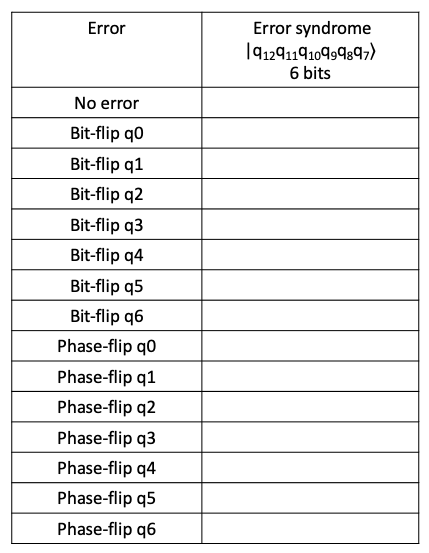


<p>&#128211; What is the error syndrome if we inject a bit-flip error on q0 and a phase flip error on q6? Are these errors detectable and correctable?

**Your answer:** 

<p>&#128211; What is the error syndrome if we inject two bit-flip errors simultaneously, one on q0 and another on q1? Are these errors detectable and correctable? Why?

**Your answer:** 